# Malaria predictor: an image classification problem
# Image preprocessing

## Dataset description

The dataset in this notebook was part of a capstone project in the Microsoft Professional Program in Artificial Intelligence which is not publicly accesible. But it was taken and adapted from a dataset from researchers at the Lister Hill National Center for Biomedical Communications (LHNCBC), part of the National Library of Medicine (NLM) who have carefully collected and annotated the [publicly available dataset](https://ceb.nlm.nih.gov/repositories/malaria-datasets/) of healthy and infected blood smear images (The dataset contains a total of 27,558 cell images with equal instances of parasitized and uninfected cells.) 

The steps to describe in this notebook are:

- Read the images or data
- Show some of them to explore its characteristics
- Rescale or normalize them 
- Converto to numpy array and save to disk

They are some basic tasks usually applied in any machine learning problem involving images as data.


### Loading the utility libraries

In [1]:
# Import libraries
import os
import random
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import numpy as np

%matplotlib inline 

### Read the data images and labels

In [2]:
# Set the root folder
root_folder='..'
# Set the folder with the dataset or images
data_folder_name='Datasets/malaria_data'
# For time performance we use this parameter to limit the images to process
images_to_process=21765


In [3]:
# ../input/
DATA_PATH = os.path.abspath(os.path.join(root_folder, data_folder_name))

# Set the path where the images for training are stored
train_path = os.path.join(DATA_PATH, "train")

# Set the path where the images for training are stored
test_path = os.path.join(DATA_PATH, "test")

# Read the filenames of the train images
train_images = glob(os.path.join(train_path, "*.jpg"))

# # Read the csv containing the target labels
labels = pd.read_csv(DATA_PATH+'/train_labels.csv')

#Save numpy arrays in a compressed file
compressed = True

#Normalize images
img_normalized=False

### Analyze sizes and characteristics in data

In [4]:
# Show some atributes of the images
r = random.sample(train_images, 16)
img=plt.imread(r[0])

print('Data type: %s' % img.dtype)
print('Min: %.3f Max: %.3f ' %(img.min(),img.max()))

img= img/255

print('Data type: %s' % img.dtype)
print('Min: %.3f Max: %.3f ' %(img.min(),img.max()))


Data type: uint8
Min: 0.000 Max: 255.000 
Data type: float64
Min: 0.000 Max: 1.000 


### Plot some images from the dataset

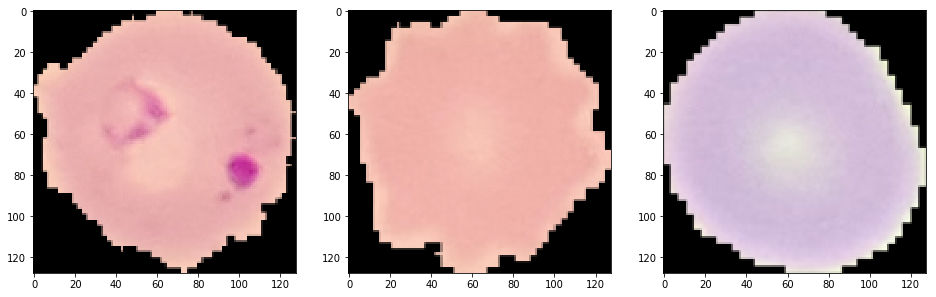

In [4]:
r = random.sample(train_images, 3)

# Matplotlib black magic
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(plt.imread(r[0]))

plt.subplot(132)
plt.imshow(plt.imread(r[1]))

plt.subplot(133)
plt.imshow(plt.imread(r[2]));    

plt.show()

### Normalization of images and conversion to numpy array

In [5]:
# Processing the images to normalize them and convert to numpy arrays
def normalize(x):
    return (x.astype(float)/255.0)

def proc_images(n,images,labels):
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """

    x = [] # images as arrays
    y = [] # labels Infiltration or Not_infiltration

    for img in images[:n]:
        base = os.path.basename(img)
#        if labels!=None:
        label = labels["infected"][labels["filename"] == base].values[0]
        y.append(label)

        # Read the image
        my_image = plt.imread(img)
        # Apend to the array and normalize
        if img_normalized:
            x.append(normalize(my_image))
        else:
            x.append(my_image)
        
    return x,y

img_array,label_array=proc_images(images_to_process,train_images,labels)
print('Images: ', len(img_array))
print('Image Array Shape:', img_array.shape)
print('Image Shape:', img_array[0].shape)

Images:  21765
Image Shape: (128, 128, 3)


In [6]:
len(label_array)

21765

### Save images and labels as np arrays to disk

In [7]:
if compressed:
    np.savez_compressed(DATA_PATH+"/x_images_arrays_zip_"+str(images_to_process), img_array)
else:
    np.savez(DATA_PATH+"/x_images_arrays_"+str(images_to_process), img_array)
    
np.savez(DATA_PATH+"/y_infected_labels_"+str(images_to_process), label_array)